
## K-Means Clustering Results Comparison

### Inertia Comparison
- Inertia (Sum of Squared Distances to Centroids) for Scratch Implementation: 44537.00
- Inertia for scikit-learn's K-Means Implementation: 44448.46

### Cluster Labels Comparison
- Cluster labels from scratch implementation: [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
- Cluster labels from scikit-learn's K-Means implementation: [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

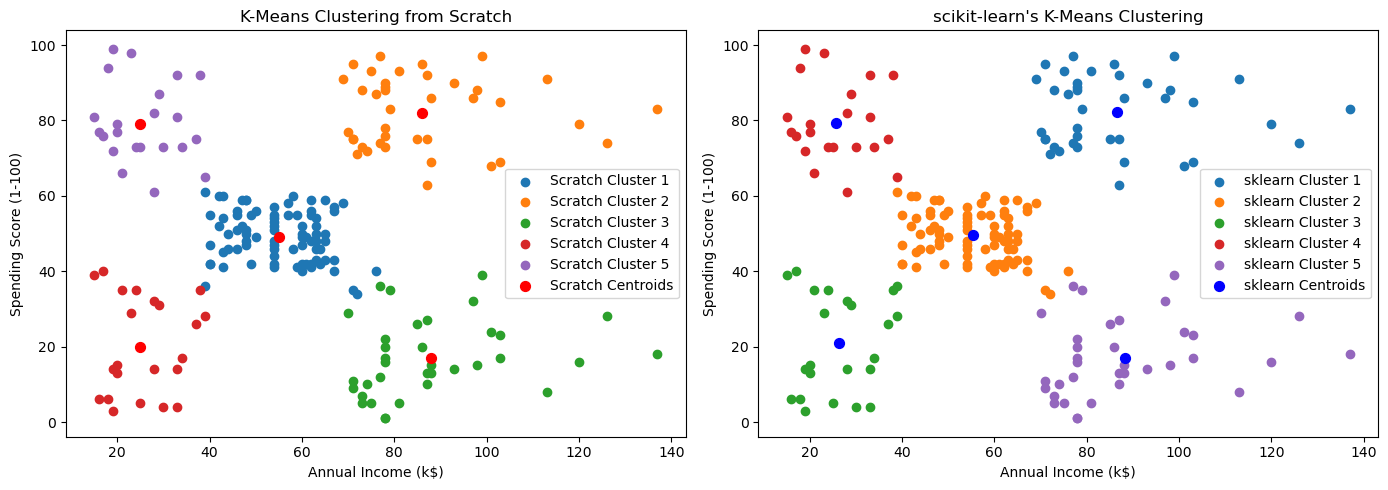

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

def kmeans_from_scratch(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        for i in range(k):
            centroids[i] = np.mean(X[labels == i], axis=0)
    
    return labels, centroids

file_path = 'data.csv'  
data = pd.read_csv(file_path)

X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

k = 5


labels_scratch, centroids_scratch = kmeans_from_scratch(X, k)

kmeans_sklearn = KMeans(n_clusters=k)
labels_sklearn = kmeans_sklearn.fit_predict(X)
centroids_sklearn = kmeans_sklearn.cluster_centers_

scratch_inertia = np.sum((X - centroids_scratch[labels_scratch])**2)
sklearn_inertia = kmeans_sklearn.inertia_


inferences = """
## K-Means Clustering Results Comparison

### Inertia Comparison
- Inertia (Sum of Squared Distances to Centroids) for Scratch Implementation: {:.2f}
- Inertia for scikit-learn's K-Means Implementation: {:.2f}

### Cluster Labels Comparison
- Cluster labels from scratch implementation: {}
- Cluster labels from scikit-learn's K-Means implementation: {}

### Centroids Comparison
- Centroids from scratch implementation: {}
- Centroids from scikit-learn's K-Means implementation: {}
""".format(scratch_inertia, sklearn_inertia, labels_scratch, labels_sklearn, centroids_scratch, centroids_sklearn)


print(inferences)


plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for cluster_label in range(k):
    cluster_points = X[labels_scratch == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Scratch Cluster {cluster_label + 1}')

plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], marker='.', s=200, c='red', label='Scratch Centroids')
plt.title('K-Means Clustering from Scratch')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.subplot(1, 2, 2)
for cluster_label in range(k):
    cluster_points = X[labels_sklearn == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'sklearn Cluster {cluster_label + 1}')

plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='.', s=200, c='blue', label='sklearn Centroids')
plt.title("scikit-learn's K-Means Clustering")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.tight_layout()
plt.show()